# Trabalho Análise de Dados usando Python e Jupyter.
### Aluno: Guilherme Augusto Deitos Alves
Base de dados: http://dadosabertos.inss.gov.br/dataset/inss-comunicacao-de-acidente-de-trabalho-cat, de Janeiro de 2022

In [36]:
%%cmd
#Instalação das bibliotecas
pip3 install geopandas
pip3 install geobr
pip3 install seaborn

Microsoft Windows [vers�o 10.0.22631.3296]
(c) Microsoft Corporation. Todos os direitos reservados.

c:\Projetos\TDS>#Instalação das bibliotecas


'#Instalação' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.



c:\Projetos\TDS>pip3 install geopandas



c:\Projetos\TDS>pip3 install geobr

c:\Projetos\TDS>pip3 install seaborn
   -------------------------------------- 294.9/294.9 kB 827.5 kB/s eta 0:00:00

c:\Projetos\TDS>

In [37]:
#Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geobr
import seaborn as sns

%matplotlib inline

In [139]:
data = pd.read_csv('dataINSS.csv', sep=';', encoding='ISO-8859-1') #Carregar dados
#Filtrar pela data do Acidente (minha tabela veio com alguns dados de outros meses)
data = data[data['Data Acidente'].str.contains("2022/01")] 

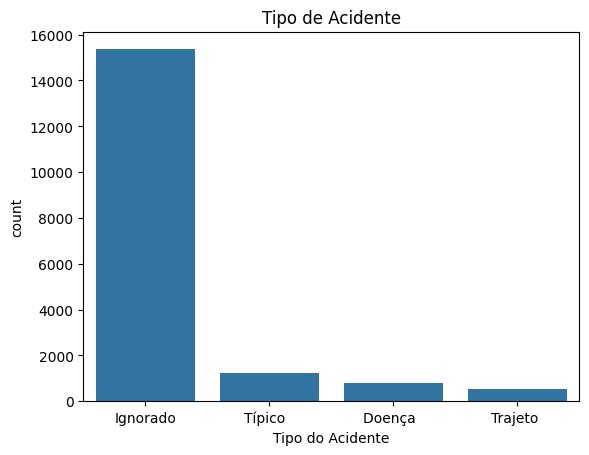

In [140]:
#Verificar qual tipo do acidente mais acontece
accidents = data['Tipo do Acidente'].value_counts()
sns.barplot(accidents)
plt.title('Tipo de Acidente')
plt.show()  

# Analise por Tipo de acidente
Acima temos um grafico que mostra a quantidade de acidentes por tipo de acidente. Podemos ver que a maior parte dos acidentes são do tipo "Ignorado", isso nos mostra que na maioria dos casos, o tipo do acidente não importa. Ademais, temos como minoria outros tipos de acidente como "Típico" (Acidentes ocasionais), doença e trajeto (acidente no trajedo do trabalho)

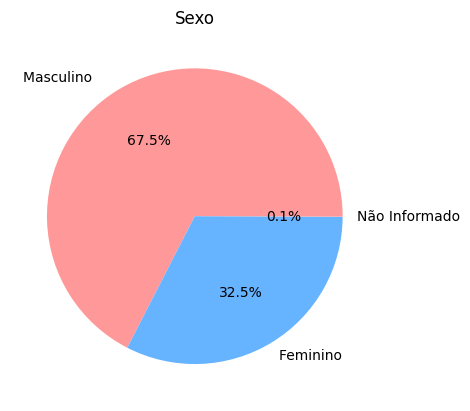

In [46]:
#Verificar o sexo mais atingido
sexCount = data['Sexo'].value_counts()
sexIndex = sexCount.index
plt.pie(sexCount, labels=sexIndex,autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sexo')
plt.show()

# Grafico de acidentes por sexo
Aqui temos um grafico que mostra a quantidade de acidentes por sexo. Podemos ver que a maior parte dos acidentes são com homens, isso pode ser explicado pelo fato de que a maioria dos trabalhadores de risco são homens. Apesar disso temos uma quantidade consideravel de acidentes com mulheres e uma quantidade pequena de acidentes com pessoas de sexo não informado.

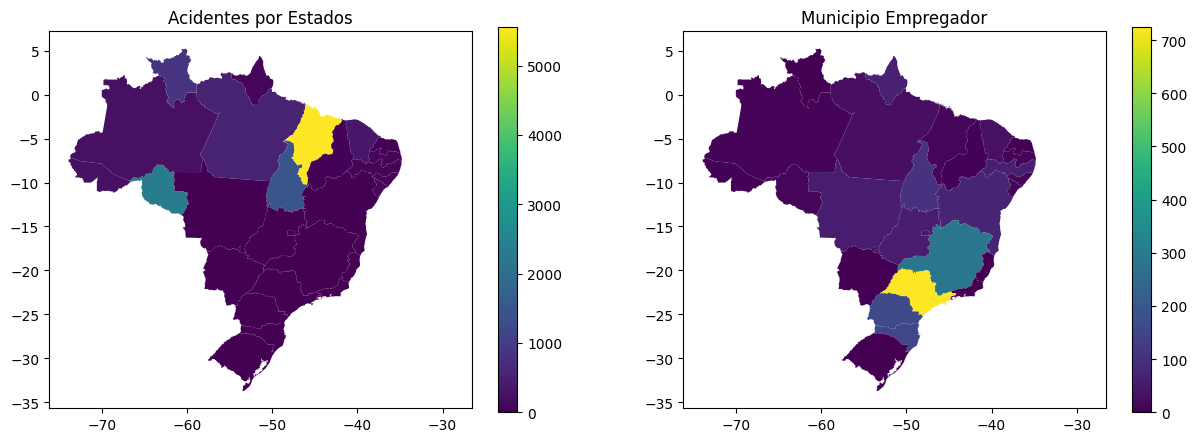

In [141]:
#UFs que mais tiveram acidentes
for uf in data['UF  Munic.  Acidente']:
    if '{' in uf or '}' in uf:
        data['UF  Munic.  Acidente'] = data['UF  Munic.  Acidente'].replace(uf, 'Não classificado')
#UFs do empregador
for uf in data['UF Munic. Empregador']:
    if '{' in uf or '}' in uf:
        data['UF Munic. Empregador'] = data['UF Munic. Empregador'].replace(uf, 'Não classificado')

gdfEstados = geobr.read_state()
gdfEstados['Acidentes por Estados'] = 0
gdfEstados['Municipio_Empregador'] = 0

acidentesPorEstado = data['UF  Munic.  Acidente'].value_counts()
municipioEmpregador = data['UF Munic. Empregador'].value_counts()
#Tirando os espaços de municipio Empregador
municipioEmpregador.index = municipioEmpregador.index.str.strip()
for UF in municipioEmpregador.index:
    if UF == 'Zerado':
        continue
    if UF in gdfEstados['name_state'].unique() and UF in municipioEmpregador:
        gdfEstados.loc[gdfEstados['name_state'] == UF, 'Municipio_Empregador'] = municipioEmpregador[UF]
        
for UF in acidentesPorEstado.index:
    if UF == 'Não classificado':
        continue
    gdfEstados.loc[gdfEstados['name_state'] == UF.strip(), 'Acidentes por Estados'] = acidentesPorEstado[UF]
    
#2 graficos lado a lado
fig, ax = plt.subplots(1,2,figsize=(15,5))

gdfEstados.plot(column='Acidentes por Estados',cmap='viridis',legend=True,ax=ax[0])
ax[0].set_title('Acidentes por Estados')
gdfEstados.plot(column='Municipio_Empregador',cmap='viridis',legend=True,ax=ax[1])
ax[1] = plt.title('Municipio Empregador')


# Comparação grafica entre acidentes por estados e os municipios empregadores
Aqui temos um grafico que compara a quantidade de acidentes por estado com a quantidade de acidentes por municipio empregador. Podemos ver que a maior parte dos acidentes ocorrem em São Paulo, isso pode ser explicado pelo fato de que São Paulo é o estado mais populoso do Brasil. Mas o curioso é que a maior parte dos acidentes ocorrem em estados que não empregam tanta gente ao compararmos os graficos, isso provavelmente ocorre devido à varios acidentes com o estado como 'Não classificado' (que é maioria).

In [30]:
#Mostrar dataframe
df = pd.DataFrame(data)
df

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,{ñ class},2022/01,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
4,Impacto de Pes. Contra Objeto em Movimento,2022/01,{ñ class},S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/01,0000/00,28/01/2022,25/07/1995,01/03/2022,00.000.000.000.000
7,{ñ class},2022/01,223505-Enfermeiro,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,18/01/2022,13/05/1982,01/03/2022,57.571.275.002.570
11,Passarela ou Plataforma Permanentes - Superfi,2022/01,951105-Eletricista de Manut. Eletroeletrônica,S12.2 Frat de Outr Vertebras Cervicais Espec,1610,Desdobramento de Madeira,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Santa Catarina,2022/01,0000/00,28/01/2022,21/03/1990,01/03/2022,00.000.000.000.000
14,{ñ class},2022/01,{ñ class},B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,20/01/2022,16/02/1965,01/03/2022,57.571.275.002.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152123,{ñ class},2022/01,000000-Não Informado,G56.0 Sindr do Tunel do Carpo,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/01,2022/06,29/01/2022,28/04/1997,00/00/0000,00.000.000.000.000
152124,{ñ class},2022/01,000000-Não Informado,S62.6 Frat de Outr Dedos,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/01,2022/06,30/01/2022,08/08/1991,00/00/0000,00.000.000.000.000
152125,{ñ class},2022/01,000000-Não Informado,T21.2 Queim de 2.Grau do Tronco,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/01,2022/06,20/01/2022,04/02/1974,00/00/0000,00.000.000.000.000
152126,{ñ class},2022/01,000000-Não Informado,S66.2 Traum Musc Extens Tend Polegar Niv Punh,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Feminino,Ignorado,Sergipe,Zerado,2022/01,2022/06,28/01/2022,04/09/1987,00/00/0000,00.000.000.000.000
